PROBLEM 1: Aminer : basic dataset analysis (collabrator: Manasa Krishnan)

In [ ]:
pip install wget 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=7da693865045e9945756d92933d054d23a432e412574b356961ae03ef751809b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [ ]:
url = 'https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip'
wget.download(url)
!unzip acm.v9.zip

Archive:  acm.v9.zip
  inflating: acm.txt                 


A) Compute the number of distinct authors, publication venues, publications, and citations/references

In [56]:
authors = []
venues = []
publications = []
references = []

with open("acm.txt", 'r+', newline = '') as f:
    for text in f:
      if text.startswith("#@"):
        for i in text[2:].split(','):
          authors.append(i.strip())
      elif text.startswith("#c"):
        venues.append(text)
      elif text.startswith("#index"):
        temp = text[6:]
        publications.append(text)
      elif text.startswith("#%"):
        references.append(text + temp)

authors = list(set(authors))
venues = list(set(venues))
publications = list(set(publications))
references = list(set(references))

pd.DataFrame({'Type':['Authors', 'Venues', 'Publications', 'References'], 'Values':[len(authors), len(venues), len(publications), len(references)]})

,Type,Values
0,Authors,1651589
1,Venues,273329
2,Publications,2385057
3,References,9671893


B) Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [ ]:
venue = []

with open("acm.txt", 'r+', newline = '') as f:
  for text in f:
    if text.startswith("#c"):
      if "Principles and Practice of Knowledge Discovery in Databases" in text:
        venue.append(text[2:])
print("Associated Venue Names:")
for v in list(set(venue)):
  print(v)

Associated Venue Names:
Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)



The count values is not accurate as they are not consistent throughout the text dataset. There are different venue names for the same conference which will result in wrong manipulation.  

C) For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

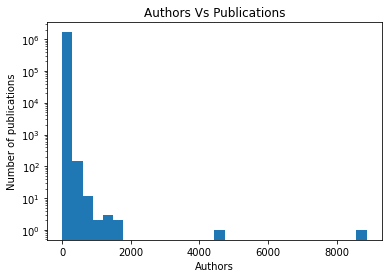

In [58]:
pub_authors = {}
with open("acm.txt", 'r+', newline = '') as f:
   for text in f:
     if text.startswith("#@"):
       for i in text[2:].split(','):
         if pub_authors.get(i.strip()) == None and i.strip() != "":
           pub_authors[i.strip()] = 1
         elif i.strip() != "":
           pub_authors[i.strip()] += 1

publications = list(pub_authors.values())
authors = list(pub_authors.keys())
plt.hist(publications, bins = 30, log = True)
plt.title('Authors Vs Publications')
plt.xlabel('Authors')
plt.ylabel('Number of publications')
plt.show()

D) Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [59]:
mean_pub = np.mean(publications)
std_pub = np.std(publications)
q1 = np.percentile(publications, 25)
median_pub = np.percentile(publications, 50)
q3 = np.percentile(publications, 75)
pd.DataFrame({'Measure':['Mean', 'Std', 'Q1', 'Q2/Median', 'Q3'], 'Values':[mean_pub, std_pub, q1, median_pub, q3]})

,Measure,Values
0,Mean,3.462492
1,Std,12.771384
2,Q1,1.000000
3,Q2/Median,1.000000
4,Q3,3.000000


The number of publications associated with an author is mostly 1. The values found above show the same. The median or Q2 is 1 while mean is 3.46 with std 12.87 this shows the median, Q1 and Q2 lies in the range of std from mean

E) Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

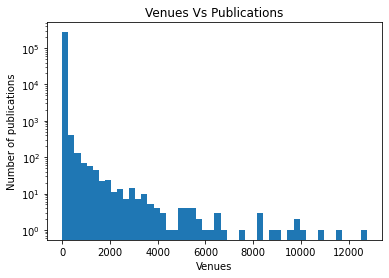

In [60]:
pub_venues = {}
with open("acm.txt", 'r+', newline = '') as f:
   for text in f:
     if text.startswith("#c"): 
       if pub_venues.get(text[2:]) == None:
         pub_venues[text[2:]] = 1
       else:
         pub_venues[text[2:]] += 1

pubication_ven = list(pub_venues.values())
venues = list(pub_venues.keys())
plt.hist(pubication_ven, bins = 50, log = True)
plt.title('Venues Vs Publications')
plt.xlabel('Venues')
plt.ylabel('Number of publications')
plt.show()

In [61]:
mean = np.mean(pubication_ven)
std = np.std(pubication_ven)
q1 = np.percentile(pubication_ven, 25)
median = np.percentile(pubication_ven, 50)
q3 = np.percentile(pubication_ven, 75)
pd.DataFrame({'Type':['Mean', 'Std', 'Q1', 'Q2/Median', 'Q3'], 'Values':[mean, std, q1, median, q3]})

,Type,Values
0,Mean,8.725485
1,Std,106.795835
2,Q1,1.000000
3,Q2/Median,1.000000
4,Q3,1.000000


In [62]:
print("Venue with max publications:",venues[list(pub_venues.values()).index(max(pub_venues.values()))])

Venue with max publications: IEEE Transactions on Information Theory



F) Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [63]:
publications = {}
citations = {}
cv_count = {}
references = {}

with open('acm.txt', 'r', newline = '') as f:
  val = 0
  for text in f:
    if text.startswith("#index"):
      val = int(text[6:])
    elif text.startswith("#c"):
      temp = text[2:]
      if publications.get(val) == None:
        publications[val] = temp
    elif text.startswith("#%"):
      if references.get(val) == None:
        references[val] = 1
      else:
        references[val] += 1

      if citations.get(int(text[2:])) == None:
        citations[int(text[2:])] = 1
      else: 
        citations[int(text[2:])] += 1
      
      v = publications.get(int(text[2:]))
      if cv_count.get(v) == None:
        cv_count[v] = 1
      else:
        cv_count[v] += 1

In [64]:
ref_keys = list(references.keys())
citation_keys = list(citations.keys())
ref_values = list(references.values())
citation_values = list(citations.values())
max_reference = max(list(references.values()))
max_citation = max(list(citations.values())) 
print("Maximum References:{0}, Publication Index:{1}".format(max_reference, ref_keys[ref_values.index(max_reference)]))
print("Maximum Citations:{0}, Publication Index:{1}".format(max_citation, citation_keys[citation_values.index(max_citation)]))

Maximum References:809, Publication Index:2015217
Maximum Citations:938039, Publication Index:2135000


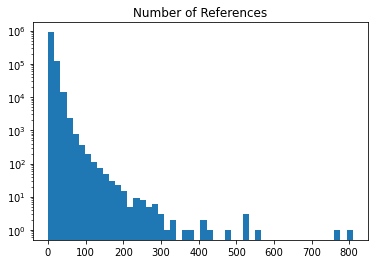

In [65]:
plt.title('Number of References')
plt.hist(list(references.values()), bins = 50, log=True)
plt.show()

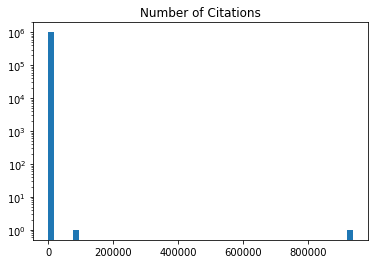

In [66]:
plt.title('Number of Citations')
plt.hist(list(citations.values()), bins = 50, log = True)
plt.show()

Yes the values make sense because a particular publication will have less reference compared to the number citations a paritcular publication might get

G) Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [67]:
impact_factor = {}
for v in cv_count.keys():
  impact_factor[v] = 0
  if v != 'None' and pub_venues.get(v) != None:
    impact_factor[v] = cv_count[v]/pub_venues[v]

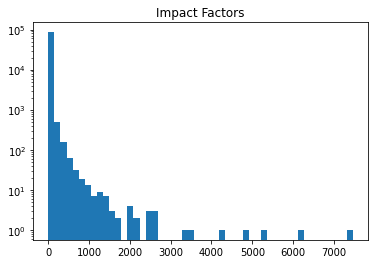

In [68]:
plt.title('Impact Factors')
plt.hist(list(impact_factor.values()), bins = 50, log = True)
plt.show()

H) What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [69]:
highest = max(list(impact_factor.values()))
highest_i = list(impact_factor.values()).index(highest)
highest_venue = list(impact_factor.keys())[highest_i]
print("Venue with the highest apparent impact factor:", highest_venue)

Venue with the highest apparent impact factor: Challenge of Microprocessors



In the data we can see that some of the names of venues are different, thereby making it ambiguous. So the answer might not be proper, that is it could be false.

I) Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

In [70]:
impact_factor_new = {}
for v in cv_count.keys():
  impact_factor_new[v] = 0
  if v != 'None' and pub_venues.get(v) != None and pub_venues[v] > 10:
    impact_factor_new[v] = cv_count[v]/pub_venues[v]

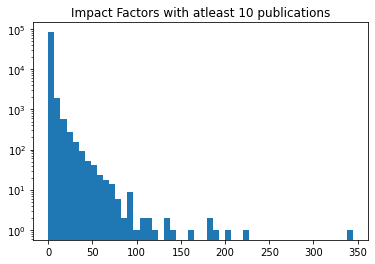

In [71]:
plt.title('Impact Factors with atleast 10 publications')
plt.hist(list(impact_factor_new.values()), bins = 50, log = True)
plt.show()

In [72]:
print('Citation for highest impact factor:', highest)

Citation for highest impact factor: 7459.0


In [73]:
median = np.median(list(cv_count.values()))
mean = np.mean(list(cv_count.values()))
print("Median:", median, 'Mean:', mean)

Median: 5.0 Mean: 111.52370135485731


We can see the x-axis is reduced on a large scale, although the shape of the histogram remains roughly the same.

J) Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [74]:
years_pub = {}
times = {}
refs = references
cits = citations
with open("acm.txt", "r", newline = '') as f:
  val = 0
  time = 0
  for text in f:
    if text.startswith("#index"):
      val = int(text[6:])
    elif text.startswith("#t"):
      time = int(text[2:])
      if years_pub.get(time) == None:
        years_pub[time] = {"cits":0, "refs":0, "pubs":0}
        years_pub[time]["pubs"] = 1
        if refs.get(val) != None:
          references = refs.get(val)
          years_pub[time]["refs"] = references
        if cits.get(val) != None:
          citations = cits.get(val)
          years_pub[time]["cits"] = citations
      else:
        years_pub[time]["pubs"] += 1
        if cits.get(val) != None:
          citations = cits.get(val)
          years_pub[time]["cits"] += citations
        if refs.get(val) != None:
          references = refs.get(val)
          years_pub[time]["refs"] += references

for time in years_pub.keys():
  times[time] = {}
  times[time]["cits"] = years_pub[time]["cits"]/years_pub[time]["pubs"]
  times[time]["refs"] = years_pub[time]["refs"]/years_pub[time]["pubs"]

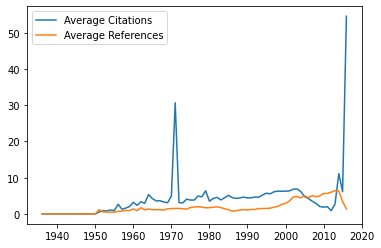

In [75]:
average_time = collections.OrderedDict(sorted(times.items()))

avg_t = list(average_time.keys())
avg_cits = list([average_time[c]["cits"] for c in avg_t])
avg_refs = list([average_time[r]["refs"] for r in avg_t])
fig, axes = plt.subplots()
plt.plot(avg_t, avg_cits, label = "Average Citations")
plt.plot(avg_t, avg_refs, label = "Average References")
axes.legend(loc = "upper left")
plt.show()

We can see a spike in average citations at 1970 and around 2015. The average number of references have been increasing slowly with a slight dip in late 1980s and a sudden dip around 2015. Avergae citations reduced for first time than average refernce between the year 2003-2012.